In [1]:
from PIL import Image
import numpy as np
from scipy.signal import fftconvolve
import scipy.signal as signal
import matplotlib.pyplot as plt

In [5]:
im = Image.open("beam.bmp").convert("L")
arr = np.array(im)

In [6]:
arr.shape

(1080, 1920)

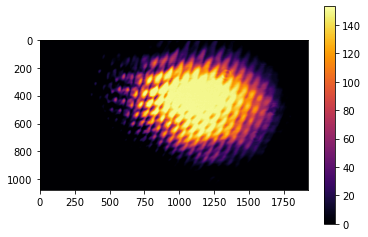

In [11]:


plt.imshow(arr, "inferno")
plt.colorbar()

Let's now normalize the array so that the max brightness is 1, and the lowest is 0.


In [16]:
normalized = arr/np.max(arr)

Let's smooth the data.

(150, 150)
(1229, 2069)
Total pixels: 2542801


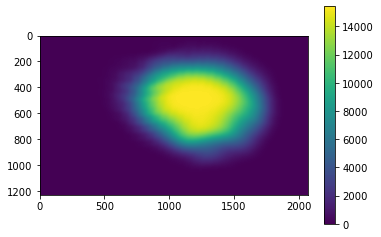

In [60]:
kernel_size = (150, 150)
# kernel = np.ones(kernel_size) / (150*150)

kernel = np.outer(signal.windows.gaussian(150, 70),
            signal.windows.gaussian(150, 70))

print(kernel.shape)

smoothed = fftconvolve(normalized, kernel)
plt.imshow(smoothed)
plt.colorbar()
print(smoothed.shape)
print(f"Total pixels: {smoothed.shape[0]*smoothed.shape[1]}")

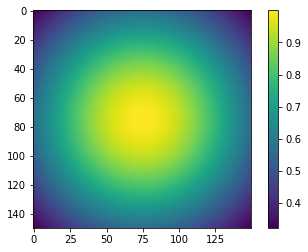

In [47]:
plt.imshow(kernel)
plt.colorbar()

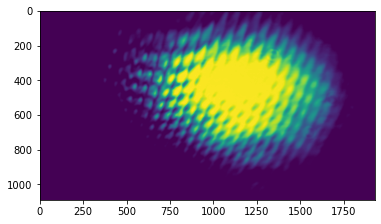

In [26]:
im

Now we need to fit this 2D brigthness plot to an elipse.

Let's first reduce the dimensionality of the smoothed array. With this many pixels a fit will take forever.

In [75]:
smoothed_image = Image.fromarray(smoothed)
resized = smoothed_image.resize((smoothed.shape[1]//4, smoothed.shape[0]//4))

resized_arr = np.array(resized)
resized_arr.shape

(307, 517)

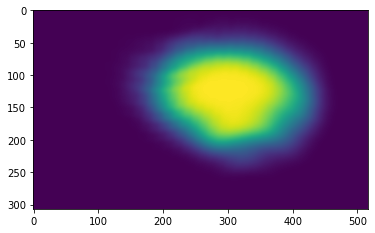

In [76]:
plt.imshow(resized_arr)

In [53]:
def twoD_Gaussian(X, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = X
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

In [97]:
# Create x and y indices
from math import sqrt

print(resized_arr.shape)

x = np.arange(0, resized_arr.shape[1], 1) 
y = np.arange(0, resized_arr.shape[0], 1)

x, y = np.meshgrid(x, y)




print(resized_arr.ravel().shape)
print(x.shape)
print(y.shape)
print(x)
# print(smoothed.)

(307, 517)
(158719,)
(307, 517)
(307, 517)
[[  0   1   2 ... 514 515 516]
 [  0   1   2 ... 514 515 516]
 [  0   1   2 ... 514 515 516]
 ...
 [  0   1   2 ... 514 515 516]
 [  0   1   2 ... 514 515 516]
 [  0   1   2 ... 514 515 516]]


(307, 517)


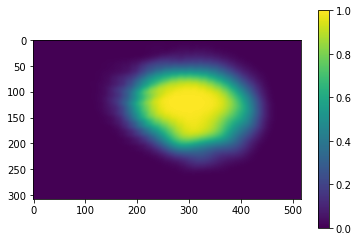

In [114]:
# normalize the resized image

normalized = resized_arr/np.max(resized_arr)
plt.imshow(normalized)
plt.colorbar()
print(normalized.shape)

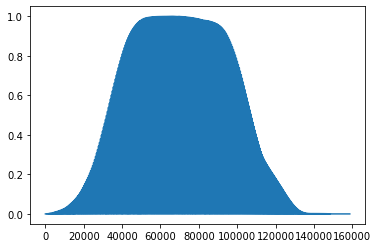

In [115]:
plt.plot(normalized.ravel())

In [136]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(twoD_Gaussian, (x, y), normalized.ravel(), p0=(1, 300, 125, 80, 50, -0.1, 0))

In [137]:
popt

array([ 1.26558948e+00,  3.03801433e+02,  1.30791602e+02,  7.64231414e+01,
        5.14731067e+01, -1.09717650e-01, -2.72108865e-02])

In [3]:
from turtle import color


data_fitted = twoD_Gaussian((x, y), *(1, 300, 125, 80, 50, -0.1, 0))

#plt.imshow(smoothed)
plt.imshow( data_fitted.reshape(resized_arr.shape))
plt.colorbar()
plt.figure()
plt.imshow(normalized)
plt.colorbar()

NameError: name 'twoD_Gaussian' is not defined

[ 1.26558948e+00  3.03801433e+02  1.30791602e+02  7.64231414e+01
  5.14731067e+01 -1.09717650e-01 -2.72108865e-02]


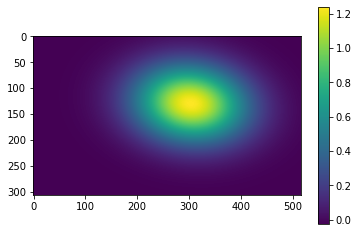

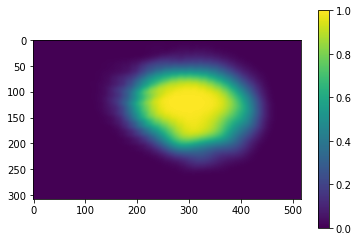

In [139]:
from turtle import color


data_fitted = twoD_Gaussian((x, y), *popt)

#plt.imshow(smoothed)
plt.imshow( data_fitted.reshape(resized_arr.shape))
plt.colorbar()
plt.figure()
plt.imshow(normalized)
plt.colorbar()
print(popt)

image.png


In [141]:
# calculate elipticity

# defining it as sigmay / sigmax where sigmax >= sigmay

e = popt[4]/popt[3]

print(f"The laser beam has an ellipticity of {e:.2f}.")

The laser beam has an ellipticity of 0.67.


(0.6735276296815353,
 982.7915338529418,
 661.9372522670523,
 array([[ 4.88355658e-07, -2.51110799e-08,  6.26054005e-08,
         -1.41491514e-05, -9.62997984e-06,  1.09140139e-09,
         -5.17564125e-09],
        [-2.51110799e-08,  1.76110149e-03,  1.05548581e-04,
         -4.12754701e-06, -5.19551251e-06,  3.59040018e-08,
          6.31278849e-08],
        [ 6.26054005e-08,  1.05548581e-04,  8.17308154e-04,
          9.16539658e-06,  8.73428007e-07,  3.85807955e-08,
         -7.97367451e-08],
        [-1.41491514e-05, -4.12754701e-06,  9.16539658e-06,
          2.36703701e-03,  3.82828084e-04,  1.69423488e-07,
         -5.10920232e-06],
        [-9.62997984e-06, -5.19551251e-06,  8.73428007e-07,
          3.82828084e-04,  1.06610254e-03,  2.91586667e-08,
         -3.33508169e-06],
        [ 1.09140139e-09,  3.59040018e-08,  3.85807955e-08,
          1.69423488e-07,  2.91586667e-08,  9.25284915e-07,
         -1.51644873e-09],
        [-5.17564125e-09,  6.31278849e-08, -7.97367451e-0

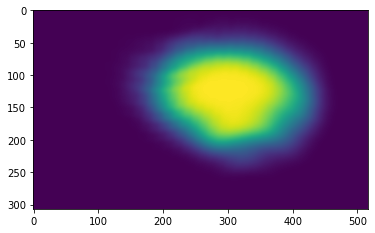

In [2]:
# test the class

from beamprofiler import BeamProfiler

beamProfiler = BeamProfiler()

beamProfiler.calibrate(6177.6, 4650.4)
beamProfiler.open("beam.bmp")
# plt.imshow(beamProfiler.image_as_array)

beamProfiler.smooth()
# plt.imshow(beamProfiler.image_as_array)
beamProfiler.scale(4) # reduces the scale of the image by 4 for easier calculations.
beamProfiler.normalize()
plt.imshow(beamProfiler.image_as_array)
beamProfiler.calculate_beam_parameters(first_guess=(1, 300, 125, 80, 50, 0, 0), convert_to_real_size=True)

In [10]:
beamProfiler.calculate_beam_parameters(first_guess=(1, 300, 125, 80, 50, 0, 0), convert_to_real_size=False)

(0.6735276296815353,
 76.42366758209492,
 51.473451678137984,
 array([[ 4.88355658e-07, -2.51110799e-08,  6.26054005e-08,
         -1.41491514e-05, -9.62997984e-06,  1.09140139e-09,
         -5.17564125e-09],
        [-2.51110799e-08,  1.76110149e-03,  1.05548581e-04,
         -4.12754701e-06, -5.19551251e-06,  3.59040018e-08,
          6.31278849e-08],
        [ 6.26054005e-08,  1.05548581e-04,  8.17308154e-04,
          9.16539658e-06,  8.73428007e-07,  3.85807955e-08,
         -7.97367451e-08],
        [-1.41491514e-05, -4.12754701e-06,  9.16539658e-06,
          2.36703701e-03,  3.82828084e-04,  1.69423488e-07,
         -5.10920232e-06],
        [-9.62997984e-06, -5.19551251e-06,  8.73428007e-07,
          3.82828084e-04,  1.06610254e-03,  2.91586667e-08,
         -3.33508169e-06],
        [ 1.09140139e-09,  3.59040018e-08,  3.85807955e-08,
          1.69423488e-07,  2.91586667e-08,  9.25284915e-07,
         -1.51644873e-09],
        [-5.17564125e-09,  6.31278849e-08, -7.97367451e-

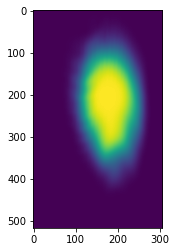

In [144]:
plt.imshow(beamProfiler.image_as_array)

In [14]:
(beamProfiler.x/beamProfiler.image_as_array.shape[0])

20.122475570032574

In [17]:
(beamProfiler.y/beamProfiler.image_as_array.shape[1])

8.994970986460347

In [13]:
np.sqrt(beamProfiler.image_as_array.shape[0]**2 + beamProfiler.image_as_array.shape[1]**2)

601.2803006917821

In [15]:
np.sqrt(beamProfiler.x**2 + beamProfiler.y**2)

7732.332243249769

In [18]:
7732.332243249769/601.2803006917821*76

977.3432620541098